In [1]:
using Catalyst
using DifferentialEquations
using WGLMakie
using Latexify
using Symbolics
using Nemo
using Oscar


Welcome to Nemo version 0.45.7

Nemo comes with absolutely no warranty whatsoever
  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.1.1


In [2]:
rn = @reaction_network begin
    k1, 0 --> S
    k2, S+I --> 2I
    k3, I --> R
    k4, R --> S
    k5, S --> R
    k6, S --> 0
    k7, I --> 0
    k8, R --> 0
end

Model ##ReactionSystem#236
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [3]:
odesys=convert(ODESystem,rn) # the corresponding system of ODEs

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [5]:
deficiency(rn)

1

In [3]:
nsys = convert(NonlinearSystem, rn)

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

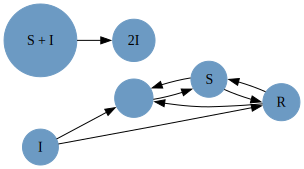

In [4]:
cg=complexgraph(rn)

In [13]:
D=incidencemat(rn)
Z=complexstoichmat(rn)

3×6 Matrix{Int64}:
 0  1  1  0  0  0
 0  0  1  2  1  0
 0  0  0  0  0  1

In [20]:
L=-Z*D

3×8 Matrix{Int64}:
 -1   1   0  -1   1  1  0  0
  0  -1   1   0   0  0  1  0
  0   0  -1   1  -1  0  0  1

In [4]:
nsys

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [5]:
symbolic_solve(equations(nsys), unknowns(nsys))

LoadError: KeyError: key S not found

In [19]:
complete(nsys)
NonlinearFunction(complete(nsys))

(::NonlinearFunction{true, SciMLBase.FullSpecialize, ModelingToolkit.var"#f#672"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1, :ˍ₋arg2), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0x9096ae7c, 0x53e8c586, 0x7f8071b2, 0x226cf4c9, 0x0412c4b6), Nothing}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋out, :ˍ₋arg1, :ˍ₋arg2), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0x4c745239, 0x3e209432, 0xe0fd5884, 0x8c441734, 0x355cad70), Nothing}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, ModelingToolkit.ObservedFunctionCache{NonlinearSystem}, Nothing, NonlinearSystem, Nothing}) (generic function with 1 method)

In [12]:
unknowns(nsys)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 S(t)
 I(t)
 R(t)